![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# Import Libraries
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/upload-icon.png?raw=true" width="100"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'

# Loading Dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/add-to-database.png?raw=true" width="100"/>

In [2]:
data = pd.read_csv('../input/housedata/data.csv')

# EDA + FE: Exploratory Data Analysis and Feature Engineering
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/data%20analysis.png?raw=true" width="100"/>

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

### We can see that this dataset doesn't have NaN values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


<AxesSubplot:>

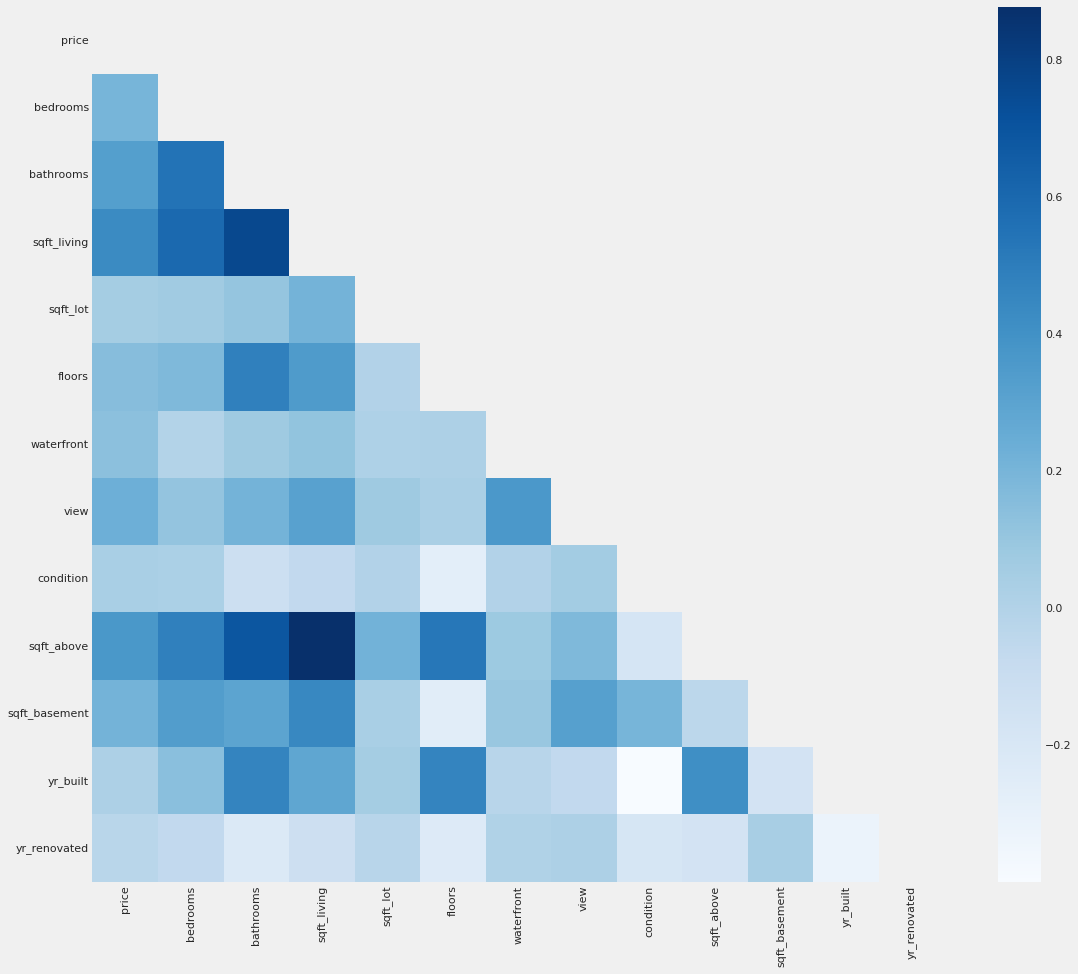

In [8]:
plt.figure(figsize=(17, 15))
corr_data = data.drop(['date'], axis=1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Blues')
h_map

### Price
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/price.png?raw=true" width="100"/>

#### Price-Column has got outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

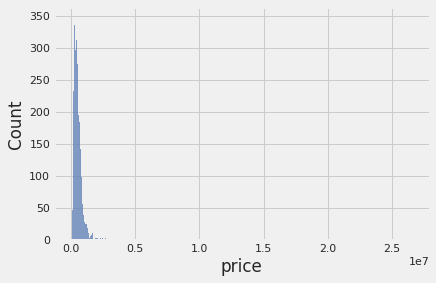

In [9]:
sns.histplot(data.price)

#### Let's delete it !

In [10]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [11]:
data = remove_outliers(data, 'price')

Outliers of price are removed



((array([-3.59729352, -3.35962078, -3.22850623, ...,  3.22850623,
          3.35962078,  3.59729352]),
  array([   7800.,   80000.,   83000., ..., 1150000., 1150000., 1150000.])),
 (211053.47018069463, 487456.9019044595, 0.9780093595347804))

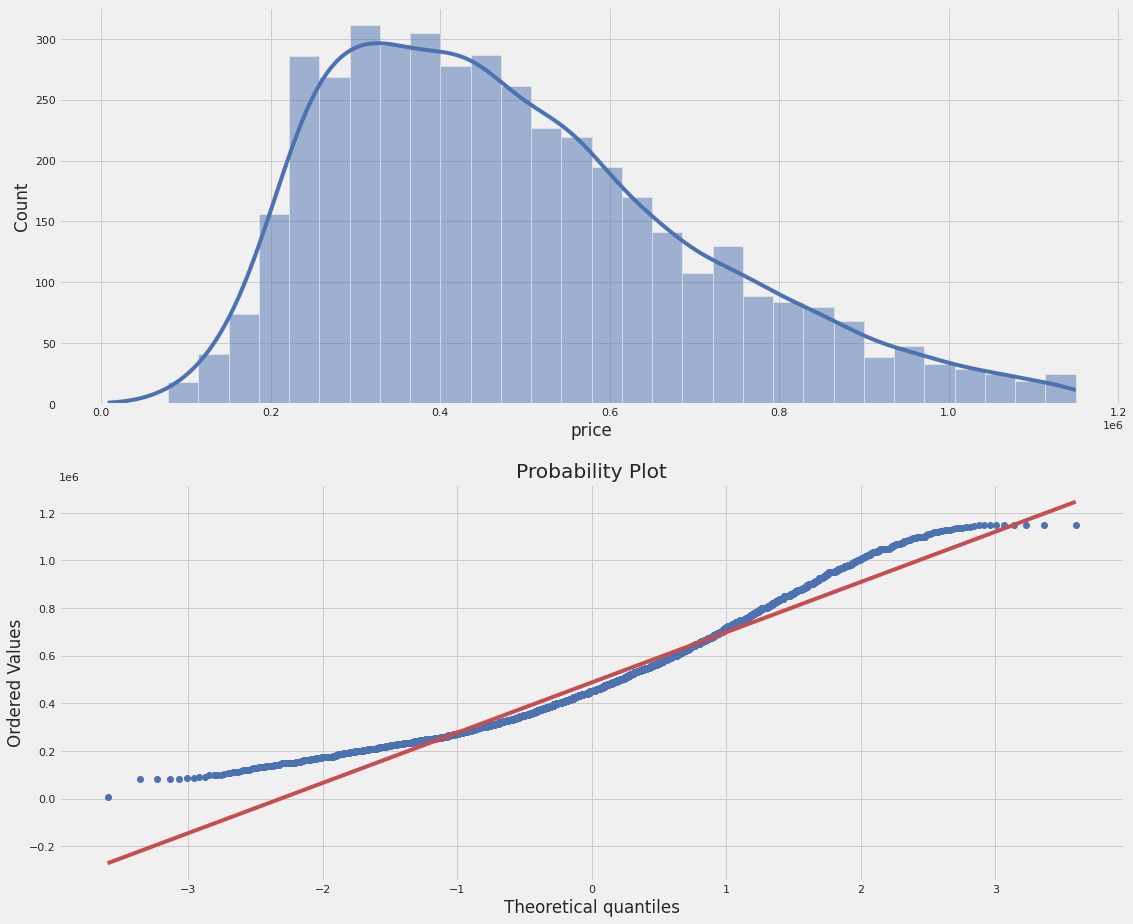

In [12]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)

Text(0.5, 0, 'index')

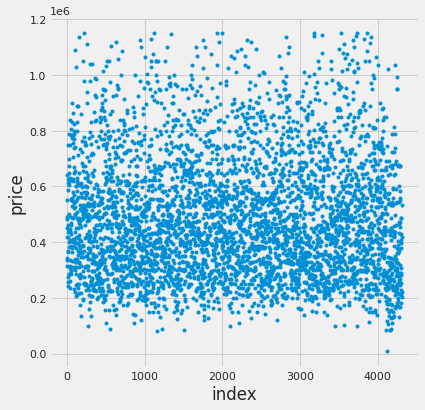

In [13]:
y = np.array(data.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')

In [14]:
data.shape

(4311, 18)


### Date
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/date.png?raw=true" width="100"/>

In [15]:
data.date = pd.to_datetime(data.date)

In [16]:
data.date.dt.year.value_counts()

2014    4311
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='price'>

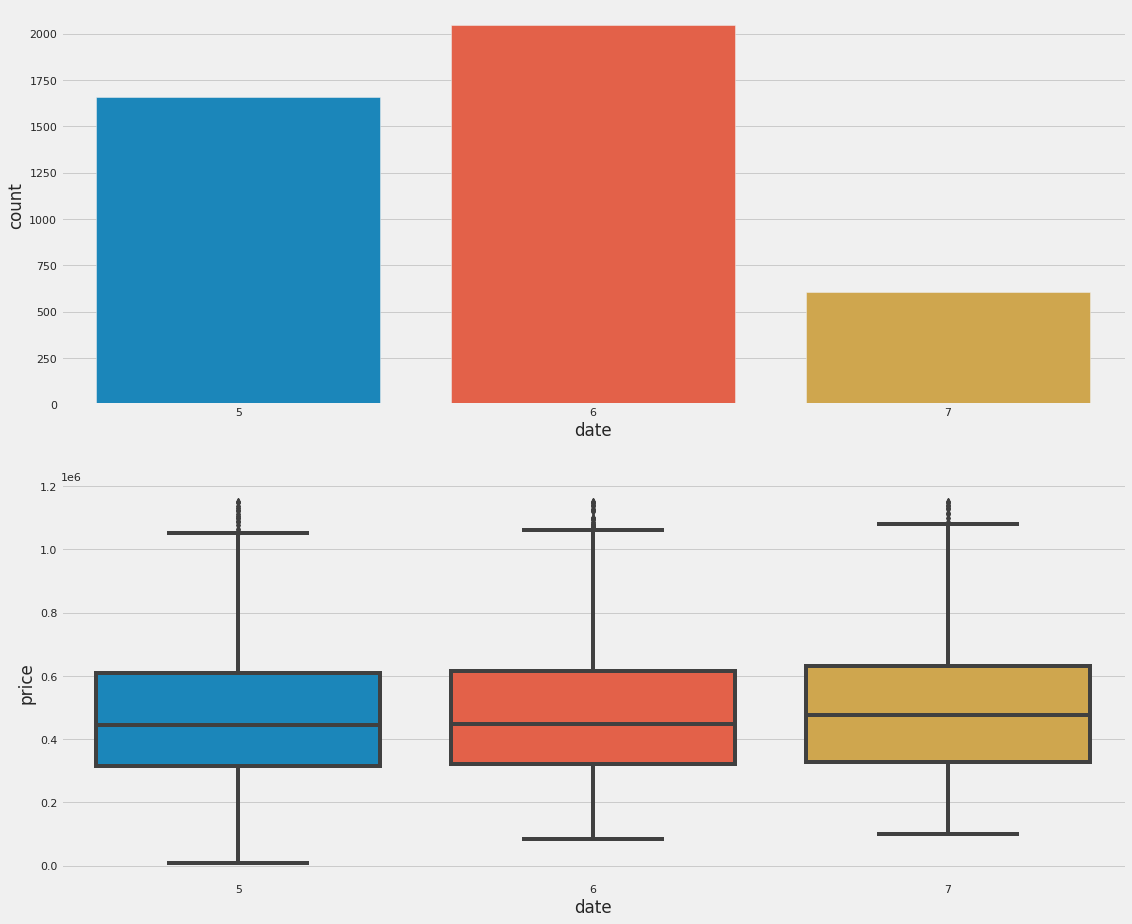

In [17]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data.date.dt.month, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=data.date.dt.month, y='price', data=data, ax=ax2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date', ylabel='count'>

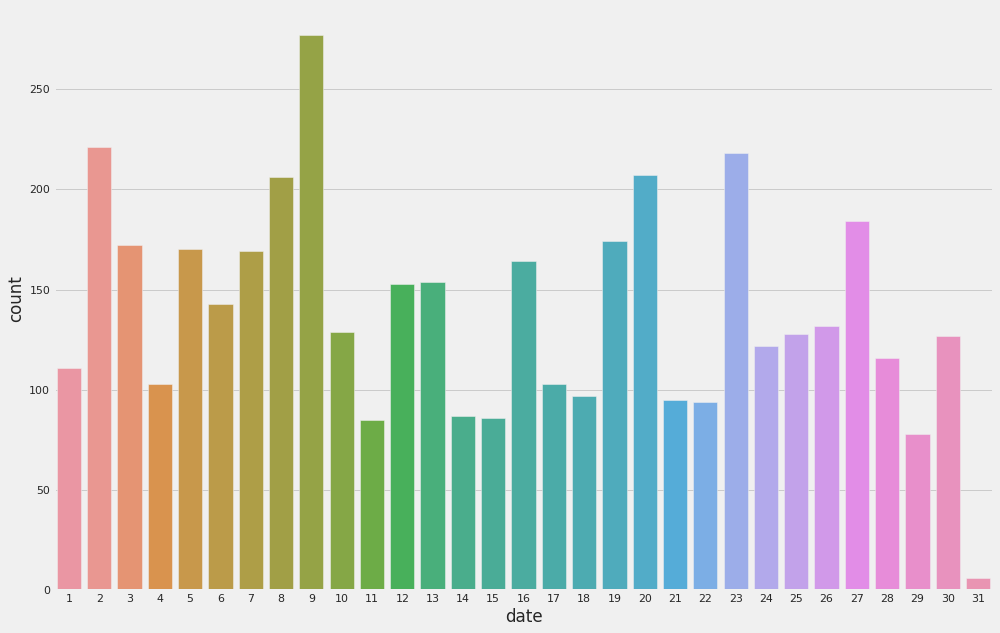

In [18]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(data.date.dt.day)

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


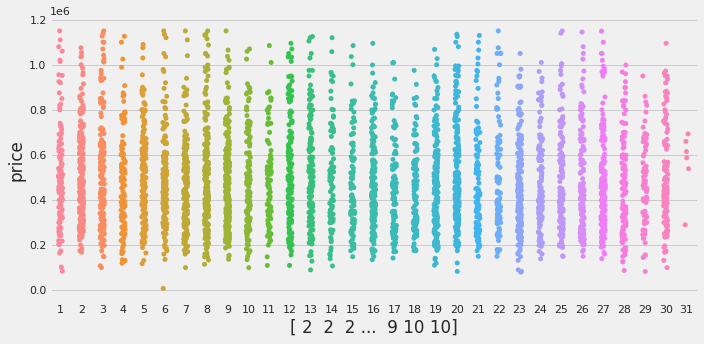

In [19]:

sns.catplot(x=data.date.dt.day.values, y='price', data=data, height=5, aspect=2)

#### Date-column have to be deleted

In [20]:
data.drop('date', axis=1, inplace=True)

#### Checking:

In [21]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


### Bedrooms
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/bedroom.png?raw=true" width="100"/>

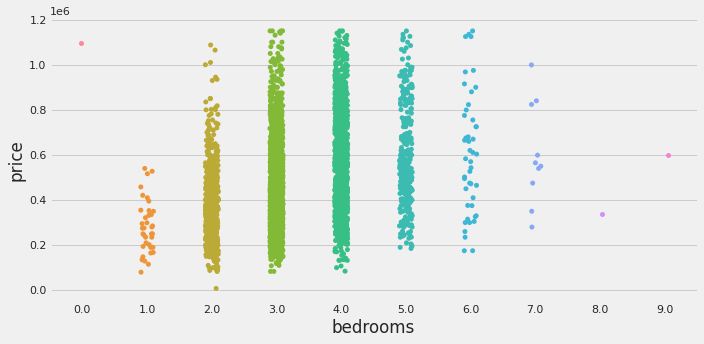

In [22]:
sns.catplot(x='bedrooms', y='price', data=data, height=5, aspect=2)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

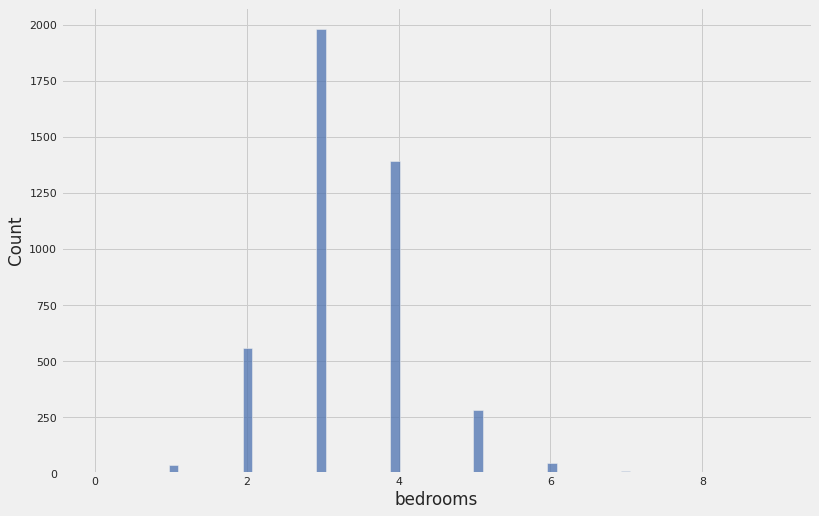

In [23]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.bedrooms)

#### We can see outliers, when the value >= 7. Let's delete this one

In [24]:
data = data[data.bedrooms < 7]

Text(0, 0.5, 'Amount')

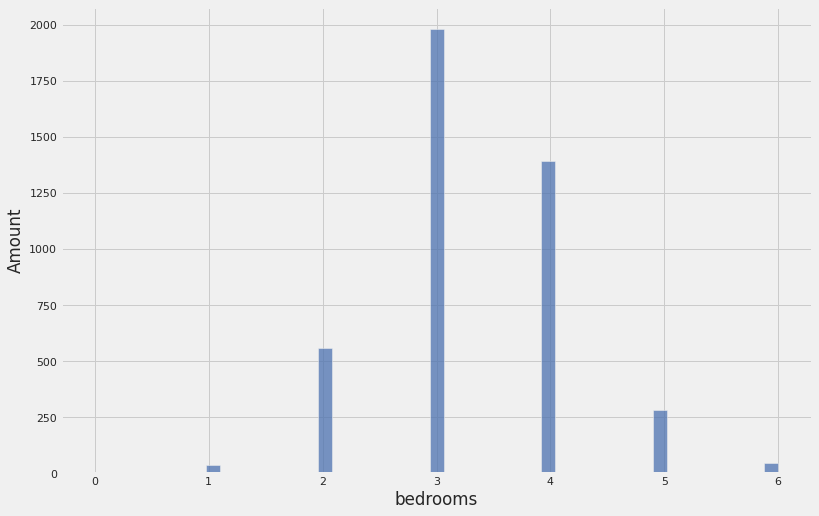

In [25]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(x=data.bedrooms)
plt.ylabel('Amount')

In [26]:
data.shape

(4299, 17)

### Bathrooms
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/bathroom.png?raw=true" width="100"/>

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

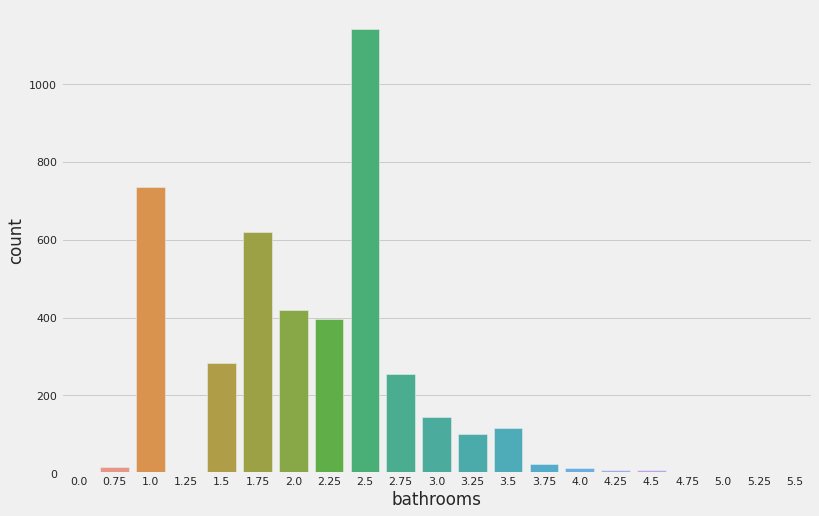

In [27]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['bathrooms'])

#### This attribute has outliers

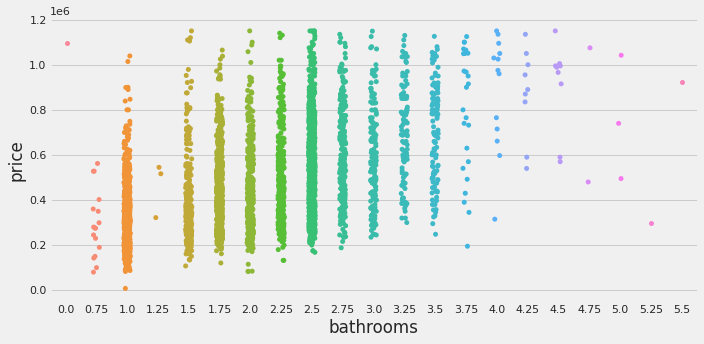

In [28]:
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [29]:
mask = (data.bathrooms < 3.75)
data = data[mask]
data.bathrooms = data.bathrooms.apply(lambda x: 1 if (x == 0.75)
                                                      or
                                                     (x == 1.25)
                                                  else x)

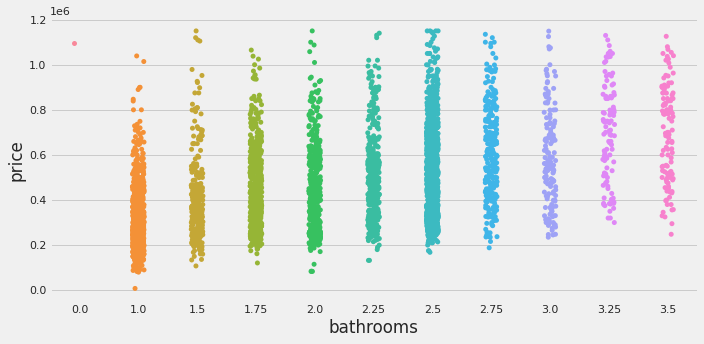

In [30]:
# Pretty good !
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [31]:
data.shape

(4236, 17)

### Square footage
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floor-plan.png?raw=true" width="100"/>

In [32]:
sqft_cols = data.columns[data.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

In [33]:
def show_count_plots(data, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(data[name], kde=True, ax=ax)

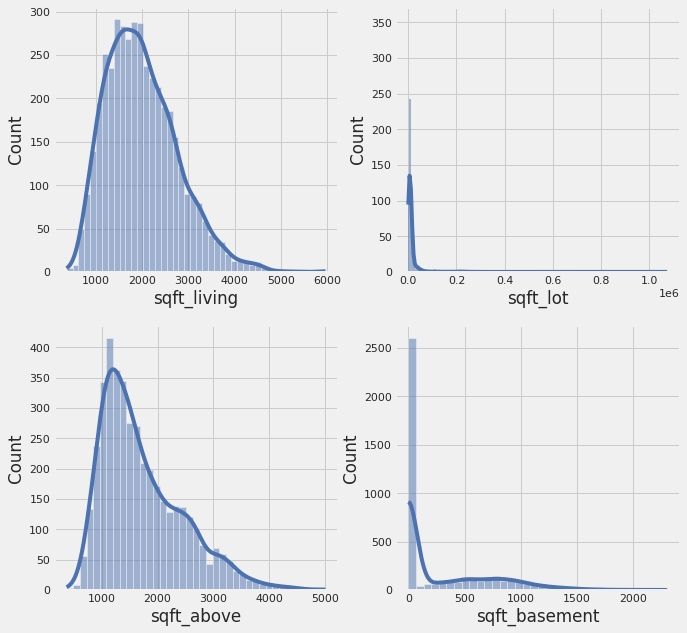

In [34]:
show_count_plots(data, sqft_cols)

### Floors
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floors.png?raw=true" width="100"/>

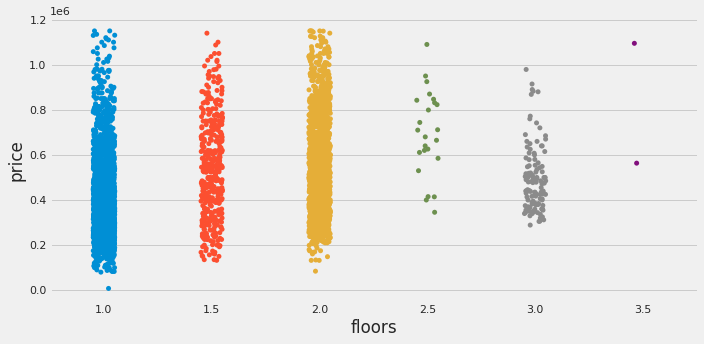

In [35]:
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

In [36]:
mask_floors = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
data.floors = data.floors.map(mask_floors)

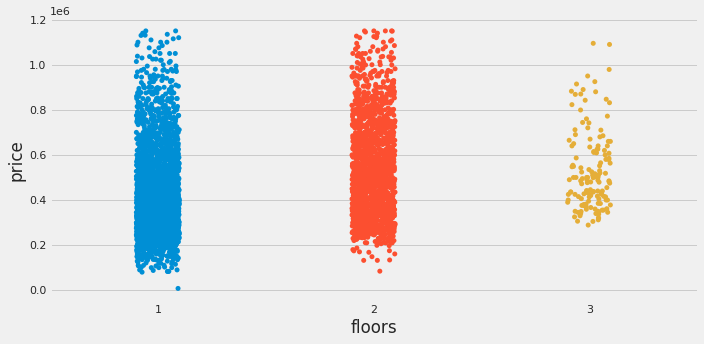

In [37]:
# Excellent !
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

#### Let's check the attributes again

In [38]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


### WaterFront
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/water.png?raw=true" width="100"/>

0    4221
1      15
Name: waterfront, dtype: int64


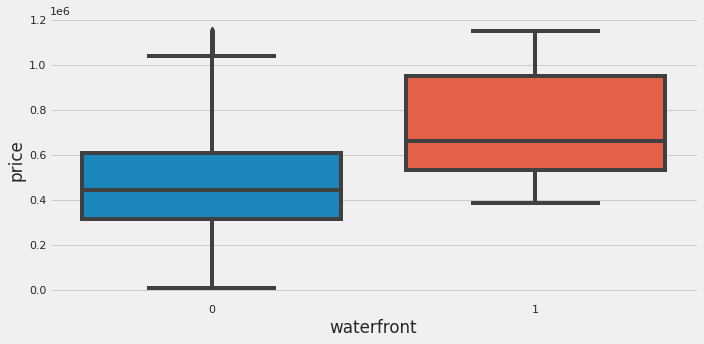

In [39]:
print(data.waterfront.value_counts())
sns.catplot(x='waterfront', y='price', data=data,
            kind='box', height=5, aspect=2)

### View
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/view-file.png?raw=true" width="100"/>

0    3925
2     159
3      68
1      54
4      30
Name: view, dtype: int64


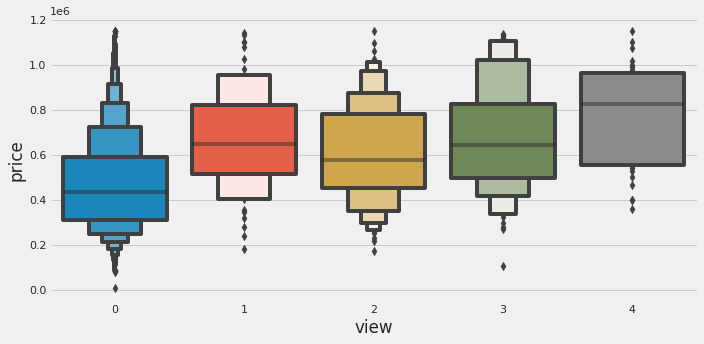

In [40]:
print(data.view.value_counts())
sns.catplot(x='view', y='price', data=data,
            kind='boxen', height=5, aspect=2)

### Condition
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/condition.png?raw=true" width="100"/>

3    2649
4    1171
5     380
2      30
1       6
Name: condition, dtype: int64


<AxesSubplot:xlabel='condition', ylabel='price'>

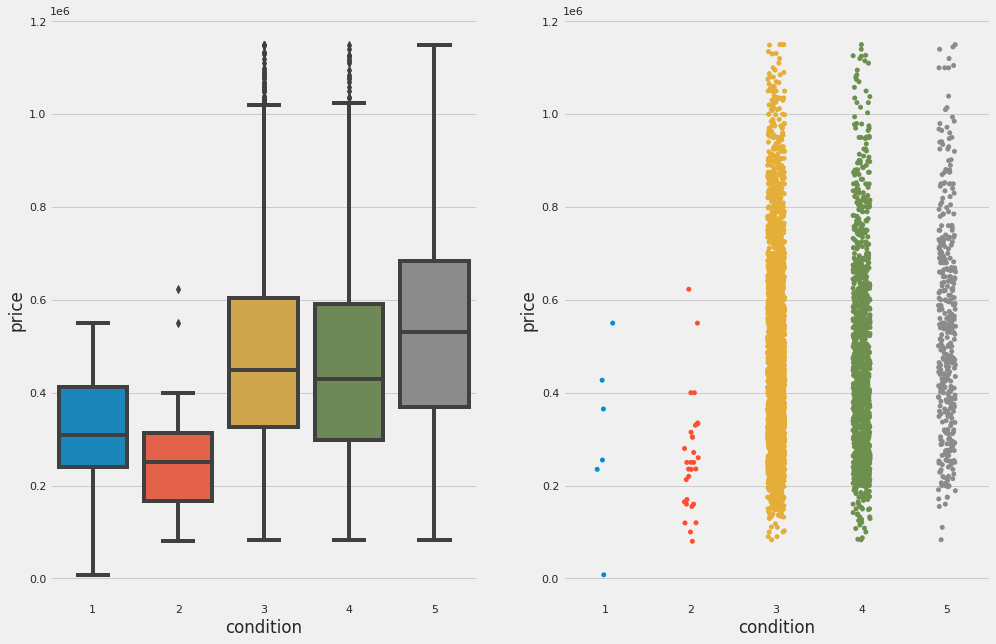

In [41]:
print(data.condition.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='condition', y='price', data=data, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='condition', y='price', data=data, ax=ax2)

#### Delete column with value = 1

In [42]:
mask_cond = data.condition > 1
data = data[mask_cond]

<AxesSubplot:xlabel='condition', ylabel='price'>

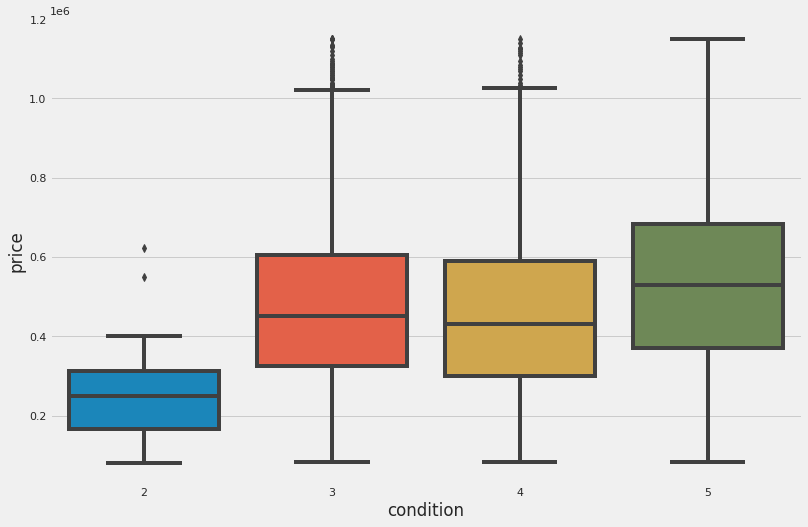

In [43]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=data)

### Years: built and renovated
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/years.png?raw=true" width="100"/>

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

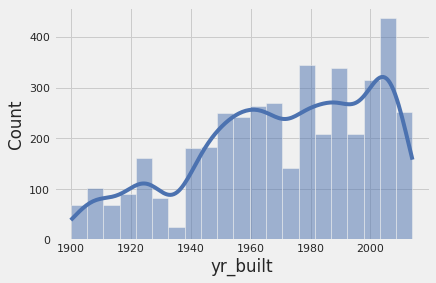

In [44]:
sns.histplot(data.yr_built, kde=True)

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

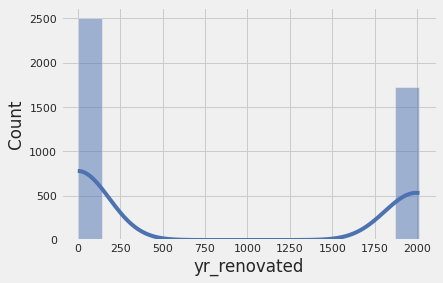

In [45]:
sns.histplot(data.yr_renovated, kde=True)

#### If house is renovated, set the value is equal 1. Else is equal 0

In [46]:
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)

0    2507
1    1723
Name: yr_renovated, dtype: int64


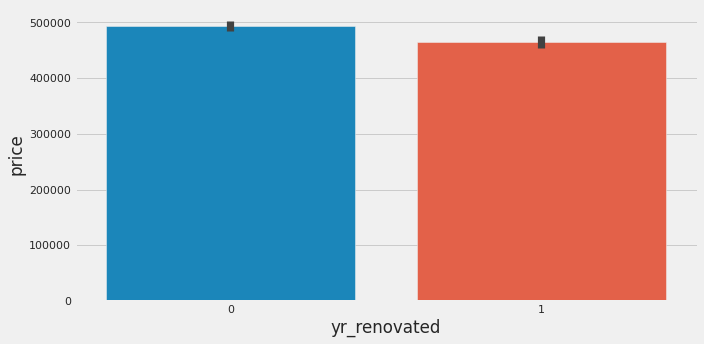

In [47]:
print(data.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', data=data,
            kind='bar', height=5, aspect=2)

#### Checking the data

In [48]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


### Location information
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/location.png?raw=true" width="100"/>

#### Street

In [49]:
data.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
513 N 46th St            2
9126 45th Ave SW         2
8216 Linden Ave N        2
                        ..
34434 30th Ave SW        1
806 S 295th Pl           1
17904 Military Rd S      1
2525 276th Ct NE         1
18717 SE 258th St        1
Name: street, Length: 4160, dtype: int64

#### This will prevent finding the common pattern

In [50]:
data.drop('street', axis=1, inplace=True)

#### City

In [51]:
data.city.value_counts().head(10)

Seattle        1437
Renton          286
Bellevue        225
Redmond         222
Kent            183
Issaquah        173
Kirkland        172
Auburn          172
Sammamish       161
Federal Way     142
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

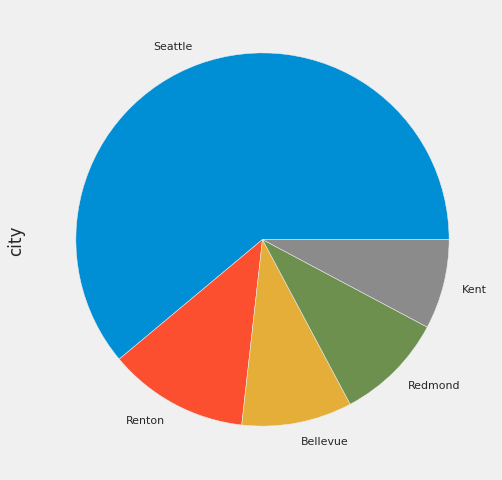

In [52]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
data.city.value_counts().head(5).plot.pie()

#### State zip

In [53]:
print(data.statezip.nunique())
print(data.statezip.value_counts())

77
WA 98103    141
WA 98052    131
WA 98117    129
WA 98115    123
WA 98059    102
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64


In [54]:
data.drop('statezip', axis=1, inplace=True)

#### Country

<AxesSubplot:xlabel='country', ylabel='count'>

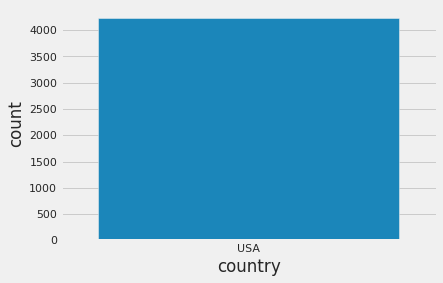

In [55]:
sns.countplot(x=data.country)

In [56]:
data.drop('country', axis=1, inplace=True)

### Checking the dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/checking.png?raw=true" width="100"/>

<AxesSubplot:>

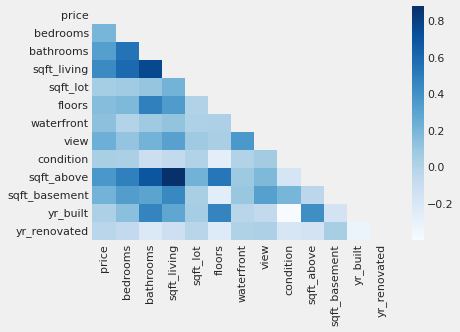

In [57]:
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Blues')
h_map

In [58]:
print(data.shape)
data.head(3)

(4230, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue


# Prepare data for training
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

In [59]:
X = data.drop('price', axis=1)
y = data.price.astype(int)

### Scaler

In [60]:
# set up preprocessing numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [61]:
# set up preprocessing categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [62]:
# select columns by datatype
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [63]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

# Model training and visualising
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/external-training-lineal-.png?raw=true" width="100"/>

In [64]:
# create a pipeline
def pipeline_model(X, y, data):
    pipe = make_pipeline(preprocessor, LinearRegression())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
          f'Score (train)   : {pipe.score(X_train, y_train)}\n'
          f'Score (test)    : {pipe.score(X_test, y_test)}\n')
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
    for i in range(times):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = int(model.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value      ----->>>>> {real} $\n'
              f'Predicted Value ----->>>>> {pred} $')
        print()


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data.drop('price', axis=1)
    y = data.price.astype(int)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})

0.6783008494901561
MSE             : 13485961978.970453

RMSE            : 116129.07464959176
MAE             : 84550.17421240291

Score (train)   : 0.6919570931182772
Score (test)    : 0.7084874251297584

Real Value      ----->>>>> 359000 $
Predicted Value ----->>>>> 355320 $

Real Value      ----->>>>> 1150000 $
Predicted Value ----->>>>> 770136 $

Real Value      ----->>>>> 525000 $
Predicted Value ----->>>>> 585236 $

Real Value      ----->>>>> 250000 $
Predicted Value ----->>>>> 150557 $

Real Value      ----->>>>> 265950 $
Predicted Value ----->>>>> 428043 $



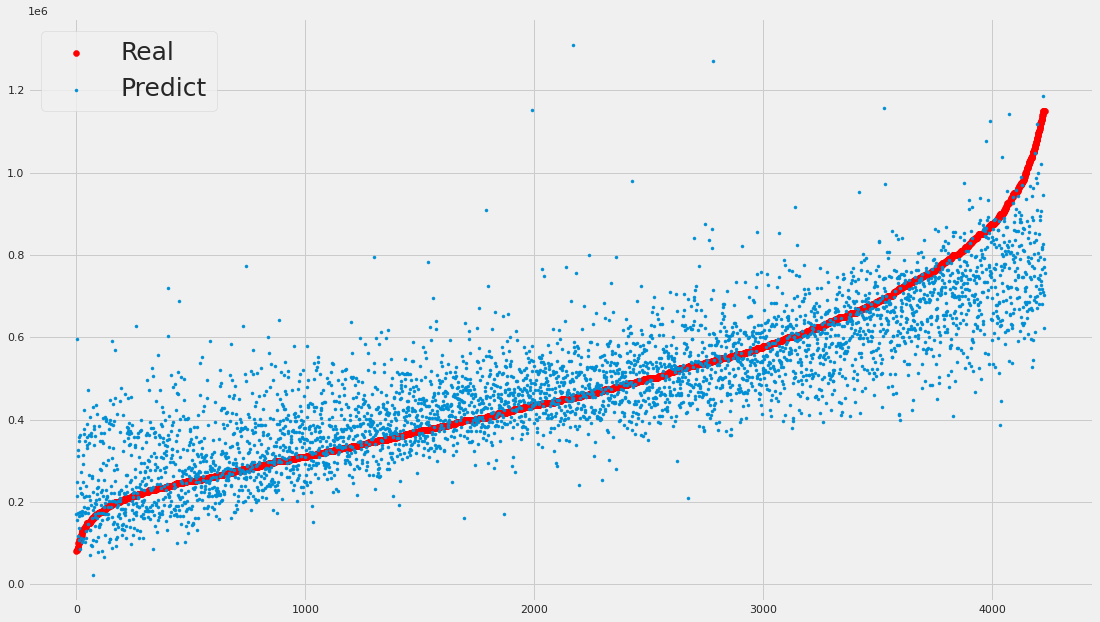

In [65]:
pipeline_model(X, y, data)